In [2]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector

In [16]:
accept = QuantumRegister(1, name="accept")
detain = QuantumRegister(1, name="detain")
justify = QuantumRegister(1, name="justify")

bribe = QuantumRegister(1, name="bribe")
false_info = QuantumRegister(1, name="false_info")
wanted = QuantumRegister(1, name="wanted")

passport = QuantumRegister(1, name="passport")
other_documents = QuantumRegister(1, name="documents")

ancilla = QuantumRegister(2, name="ancilla")

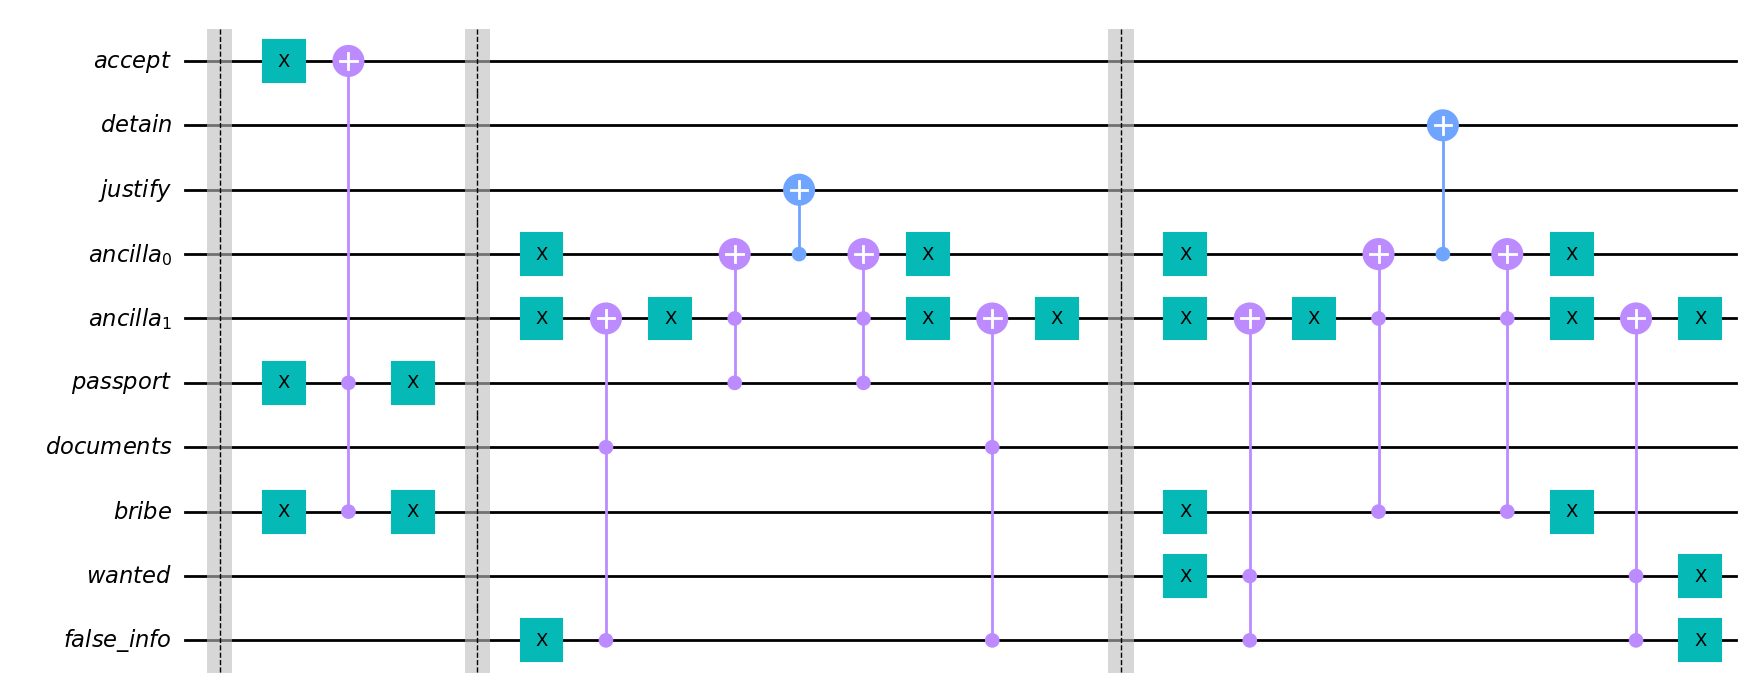

<IPython.core.display.Latex object>

In [100]:
qc = QuantumCircuit(accept, detain, justify, ancilla, passport, other_documents, bribe, wanted, false_info)


qc.barrier()

qc.x(accept)
qc.x(bribe)
qc.x(passport)
qc.ccx(bribe, passport, accept)
qc.x(bribe)
qc.x(passport)

qc.barrier()

qc.x(ancilla[-1])
qc.x(ancilla[-2])
qc.x(false_info)
qc.ccx(false_info, other_documents, ancilla[-1])
qc.x(ancilla[-1])
qc.ccx(passport, ancilla[-1], ancilla[-2])
qc.cx(ancilla[-2], justify)
qc.ccx(passport, ancilla[-1], ancilla[-2])
qc.x(ancilla[-1])
qc.ccx(false_info, other_documents, ancilla[-1])
qc.x(ancilla[-1])
qc.x(ancilla[-2])

qc.barrier()


qc.x(wanted)
qc.x(bribe)
qc.x(ancilla[-1])
qc.x(ancilla[-2])
qc.ccx(false_info, wanted, ancilla[-1])
qc.x(ancilla[-1])
qc.ccx(bribe, ancilla[-1], ancilla[-2])
qc.cx(ancilla[-2], detain)
qc.ccx(bribe, ancilla[-1], ancilla[-2])
qc.x(ancilla[-1])
qc.ccx(false_info, wanted, ancilla[-1])
qc.x(false_info)
qc.x(wanted)
qc.x(bribe)
qc.x(ancilla[-1])
qc.x(ancilla[-2])

display(qc.draw("mpl"))
Statevector(qc).draw("latex")

In [101]:
qc.depth()

21

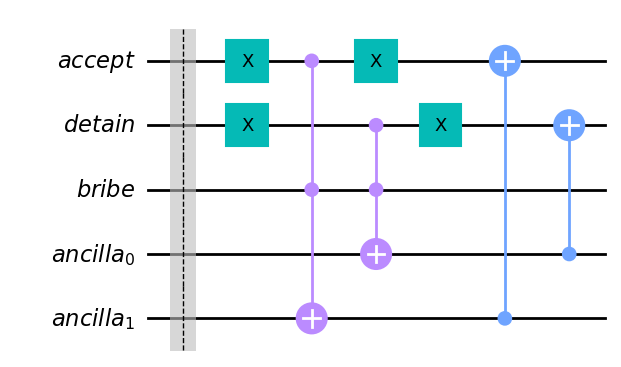

<IPython.core.display.Latex object>

In [4]:
qc = QuantumCircuit(accept, detain, bribe, ancilla)


qc.barrier()

qc.x(accept)
qc.x(detain)
qc.ccx(accept, bribe, ancilla[-1])
qc.ccx(detain, bribe, ancilla[-2])
qc.x(detain)
qc.x(accept)


qc.cx(ancilla[-1], accept)
qc.cx(ancilla[-2], detain)


display(qc.draw("mpl"))
Statevector(qc).draw("latex")

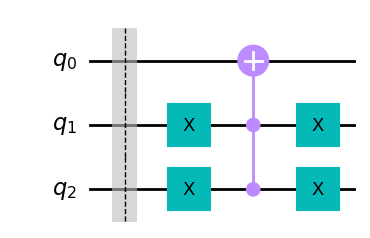

<IPython.core.display.Latex object>

In [16]:
qc_or = QuantumCircuit(3)


qc_or.barrier()

qc_or.x(range(1,3))
qc_or.ccx(2, 1, 0)
qc_or.x(range(1,3))

display(qc_or.draw("mpl"))
Statevector(qc_or).draw("latex")

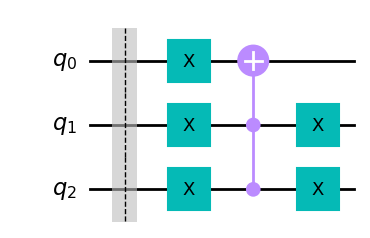

<IPython.core.display.Latex object>

In [23]:
qc_d = QuantumCircuit(3)

qc_d.barrier()

qc_d.x([0, 1,2])
qc_d.ccx(2, 1, 0)
qc_d.x([1,2])

display(qc_d.draw("mpl"))
Statevector(qc_d).draw("latex")

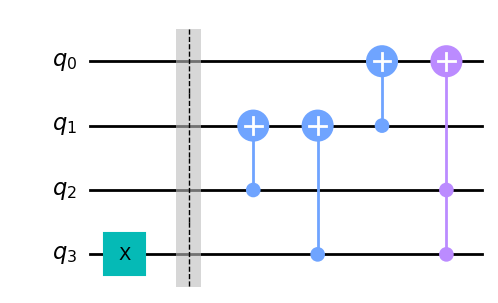

<IPython.core.display.Latex object>

In [66]:
qc_c = QuantumCircuit(4)

#qc_c.x(1)
#qc_c.x(2)
qc_c.x(3)

qc_c.barrier()



qc_c.cx(2, 1)
qc_c.cx(3, 1)
qc_c.cx(1, 0)
qc_c.ccx(3, 2, 0)

display(qc_c.draw("mpl"))
Statevector(qc_c).draw("latex")